<a href="https://colab.research.google.com/github/Surabhi08-DA/Retail_analysis/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install wordcloud



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("new_retail_data.csv")
df

Transaction_ID  Customer_ID                 Name  \
0           8691788.0      37249.0  Michelle Harrington   
1           2174773.0      69749.0          Kelsey Hill   
2           6679610.0      30192.0         Scott Jensen   
3           7232460.0      62101.0        Joseph Miller   
4           4983775.0      27901.0        Debra Coleman   
...               ...          ...                  ...   
14985       2601028.0      69935.0        Crystal White   
14986       8358627.0      68362.0        Kyle Galloway   
14987       7904710.0      50065.0     Christine Taylor   
14988       7673044.0      38945.0        Marcia Garcia   
14989       9677981.0      70984.0        Roy Hernandez   

                       Email         Phone                        Address  \
0          Ebony39@gmail.com  1.414787e+09              3959 Amanda Burgs   
1           Mark36@gmail.com  6.852900e+09             82072 Dawn Centers   
2          Shane85@gmail.com  8.362160e+09              4133 Young Canyon   
3           Mary34@gmail.com  2.776752e+09    8148 Thomas Creek Suite 100   
4        Charles30@gmail.com  9.098268e+09      5813 Lori Ports Suite 269   
...                      ...           ...                            ...   
14985      Renee49@gmail.com  8.211083e+09      13216 Calderon Trafficway   
14986     Parker99@gmail.com  8.228018e+09           958 Chloe Throughway   
14987       Lisa19@gmail.com  9.112991e+09   24830 Pittman Walks Apt. 675   
14988    Matthew95@gmail.com  9.846192e+09                938 Willie Path   
14989  Elizabeth13@gmail.com  5.932160e+09  65067 Medina Course Suite 533   

             City            State  Zipcode    Country  ...  Total_Amount  \
0        Dortmund           Berlin  77985.0    Germany  ...    324.086270   
1      Nottingham          England  99071.0         UK  ...    806.707815   
2         Geelong  New South Wales  75929.0  Australia  ...   1063.432799   
3        Edmonton          Ontario  88420.0     Canada  ...   2466.854021   
4         Bristol          England  48704.0         UK  ...    248.553049   
...           ...              ...      ...        ...  ...           ...   
14985  Portsmouth          England  31548.0         UK  ...     31.237707   
14986  Portsmouth          England  25823.0         UK  ...    475.689411   
14987  Portsmouth          England  68085.0         UK  ...    851.743936   
14988  Portsmouth          England  81964.0         UK  ...   1566.001712   
14989  Portsmouth          England  69804.0         UK  ...           NaN   

      Product_Category      Product_Brand Product_Type   Feedback  \
0             Clothing               Nike       Shorts  Excellent   
1          Electronics            Samsung       Tablet  Excellent   
2                Books      Penguin Books   Children's    Average   
3           Home Decor         Home Depot        Tools  Excellent   
4              Grocery             Nestle    Chocolate        Bad   
...                ...                ...          ...        ...   
14985       Home Decor  Bed Bath & Beyond      Bedding  Excellent   
14986         Clothing             Adidas        Shoes  Excellent   
14987            Books      Penguin Books  Non-Fiction        Bad   
14988          Grocery              Pepsi        Water  Excellent   
14989              NaN                NaN          NaN        NaN   

       Shipping_Method Payment_Method Order_Status  Ratings           products  
0             Same-Day     Debit Card      Shipped      5.0     Cycling shorts  
1             Standard    Credit Card   Processing      4.0         Lenovo Tab  
2             Same-Day    Credit Card   Processing      2.0   Sports equipment  
3             Standard         PayPal   Processing      4.0      Utility knife  
4             Standard           Cash      Shipped      1.0  Chocolate cookies  
...                ...            ...          ...      ...                ...  
14985         Same-Day    Credit Card    Delivered  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14990 entries, 0 to 14989
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    14974 non-null  float64
 1   Customer_ID       14967 non-null  float64
 2   Name              14978 non-null  object 
 3   Email             14977 non-null  object 
 4   Phone             14969 non-null  float64
 5   Address           14982 non-null  object 
 6   City              14990 non-null  object 
 7   State             14990 non-null  object 
 8   Zipcode           14976 non-null  float64
 9   Country           14990 non-null  object 
 10  Age               14988 non-null  float64
 11  Gender            14972 non-null  object 
 12  Income            14990 non-null  object 
 13  Customer_Segment  14989 non-null  object 
 14  Date              14973 non-null  object 
 15  Year              14971 non-null  float64
 16  Month             14966 non-null  object

In [ ]:
df.shape

(14990, 30)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country   Age  Gender Income Customer_Segment        Date  \
0  77985.0    Germany  21.0    Male    Low          Regular   9/18/2023   
1  99071.0         UK  19.0  Female    Low          Premium  12/31/2023   
2  75929.0  Australia  48.0    Male    Low          Regular   4/26/2023   
3  88420.0     Canada  56.0    Male   High          Premium    5/8/2023   
4  48704.0         UK  22.0    Male    Low          Premium   1/10/2024   

     Year      Month      Time  Total_Purchases      Amount  Total_Amount  \
0  2023.0  September  22:03:55              3.0  108.028757    324.086270   
1  2023.0   December   8:42:04              2.0  403.353907    806.707815   
2  2023.0      April   4:06:29              3.0  354.477600   1063.432799   
3  2023.0        May  14:55:17              7.0  352.407717   2466.854021   
4  2024.0    January  16:54:07              2.0  124.276524    248.553049   

  Product_Category  Product_Brand Product_Type   Feedback Shipping_Method  \
0         Clothing           Nike       Shorts  Excellent        Same-Day   
1      Electronics        Samsung       Tablet  Excellent        Standard   
2            Books  Penguin Books   Children's    Average        Same-Day   
3       Home Decor     Home Depot        Tools  Excellent        Standard   
4          Grocery         Nestle    Chocolate        Bad        Standard   

  Payment_Method Order_Status  Ratings           products  
0     Debit Card      Shipped      5.0     Cycling shorts  
1    Credit Card   Processing      4.0         Lenovo Tab  
2    Credit Card   Processing      2.0   Sports equipment  
3         PayPal   Processing      4.0      Utility knife  
4           Cash      Shipped      1.0  Chocolate cookies

In [ ]:
df.describe().T

count          mean           std           min  \
Transaction_ID   14974.0  5.523572e+06  2.592901e+06  1.000307e+06   
Customer_ID      14967.0  5.532510e+04  2.610676e+04  1.000100e+04   
Phone            14969.0  5.466347e+09  2.601777e+09  1.000146e+09   
Zipcode          14976.0  5.008657e+04  2.895419e+04  5.270000e+02   
Age              14988.0  2.222678e+01  7.043252e+00  1.800000e+01   
Year             14971.0  2.023169e+03  3.747586e-01  2.023000e+03   
Total_Purchases  14966.0  5.386276e+00  2.879330e+00  1.000000e+00   
Amount           14979.0  2.544415e+02  1.412490e+02  1.002051e+01   
Total_Amount     14967.0  1.377222e+03  1.142854e+03  1.098272e+01   
Ratings          14973.0  2.735858e+00  1.388772e+00  1.000000e+00   

                          25%           50%           75%           max  
Transaction_ID   3.252376e+06  5.515444e+06  7.781867e+06  9.999228e+06  
Customer_ID      3.279100e+04  5.537300e+04  7.813000e+04  9.998900e+04  
Phone            3.215979e+09  5.402343e+09  7.764136e+09  9.999896e+09  
Zipcode          2.516975e+04  5.021500e+04  7.470150e+04  9.994100e+04  
Age              1.900000e+01  2.100000e+01  2.400000e+01  7.000000e+01  
Year             2.023000e+03  2.023000e+03  2.023000e+03  2.024000e+03  
Total_Purchases  3.000000e+00  5.000000e+00  8.000000e+00  1.000000e+01  
Amount           1.323049e+02  2.547888e+02  3.771534e+02  4.999626e+02  
Total_Amount     4.350960e+02  1.041774e+03  2.043843e+03  4.999626e+03  
Ratings          1.000000e+00  2.000000e+00  4.000000e+00  5.000000e+00

<Axes: >

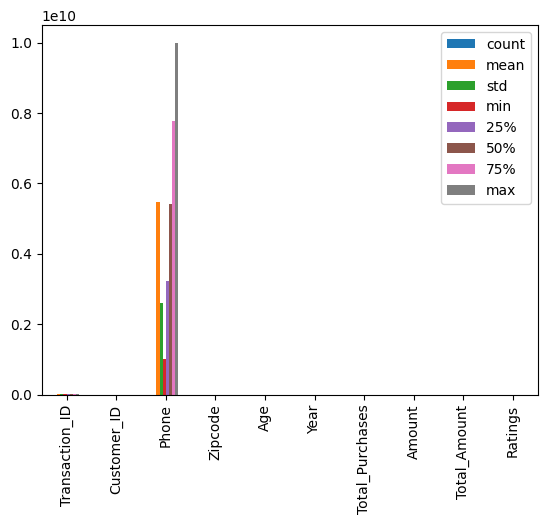

In [ ]:
df.describe().T.plot(kind='bar')

In [ ]:
df.isna().sum()

Transaction_ID      16
Customer_ID         23
Name                12
Email               13
Phone               21
Address              8
City                 0
State                0
Zipcode             14
Country              0
Age                  2
Gender              18
Income               0
Customer_Segment     1
Date                17
Year                19
Month               24
Time                15
Total_Purchases     24
Amount              11
Total_Amount        23
Product_Category    18
Product_Brand       15
Product_Type         1
Feedback            17
Shipping_Method     16
Payment_Method      15
Order_Status        22
Ratings             17
products             1
dtype: int64

In [ ]:
df=df.fillna(0)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

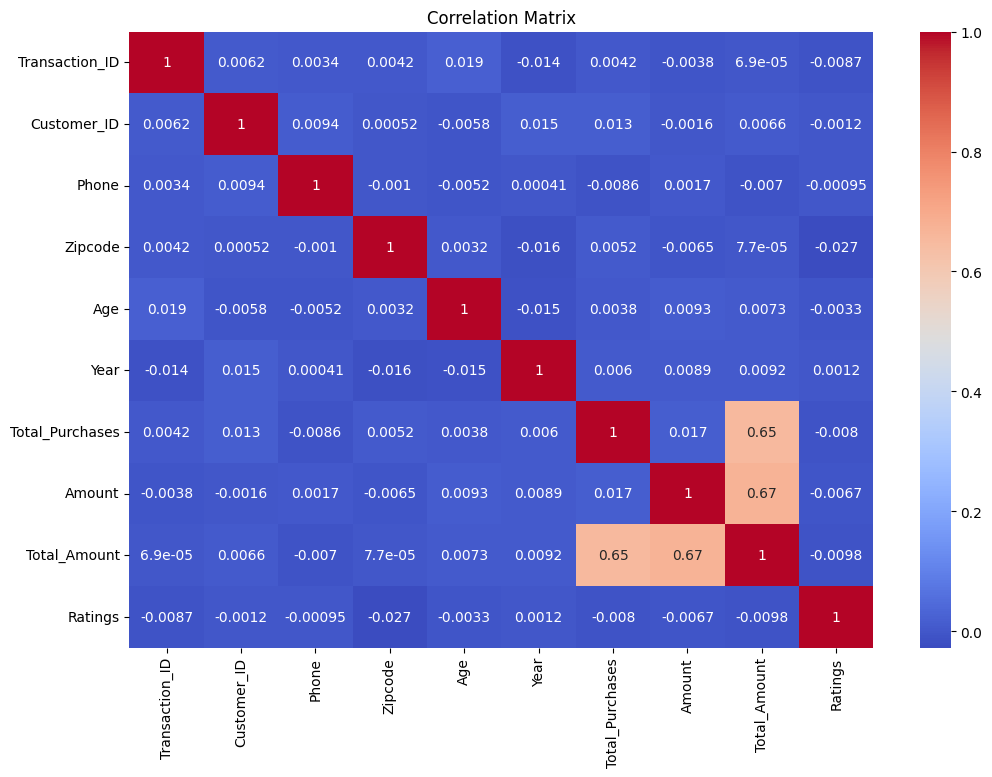

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.columns.to_list()

['Transaction_ID',
 'Customer_ID',
 'Name',
 'Email',
 'Phone',
 'Address',
 'City',
 'State',
 'Zipcode',
 'Country',
 'Age',
 'Gender',
 'Income',
 'Customer_Segment',
 'Date',
 'Year',
 'Month',
 'Time',
 'Total_Purchases',
 'Amount',
 'Total_Amount',
 'Product_Category',
 'Product_Brand',
 'Product_Type',
 'Feedback',
 'Shipping_Method',
 'Payment_Method',
 'Order_Status',
 'Ratings',
 'products']

In [ ]:
import plotly.express as px

columns = ['Transaction_ID',
 'Customer_ID',
 'Name',
 'Email',
 'Phone',
 'Address',
 'City',
 'State',
 'Zipcode',
 'Country',
 'Age',
 'Gender',
 'Income',
 'Customer_Segment',
 'Date',
 'Year',
 'Month',
 'Time',
 'Total_Purchases',
 'Amount',
 'Total_Amount',
 'Product_Category',
 'Product_Brand',
 'Product_Type',
 'Feedback',
 'Shipping_Method',
 'Payment_Method',
 'Order_Status',
 'Ratings',
 'products']
for column in columns:
    fig = px.histogram(data_frame=df, x=column)
    fig.show()

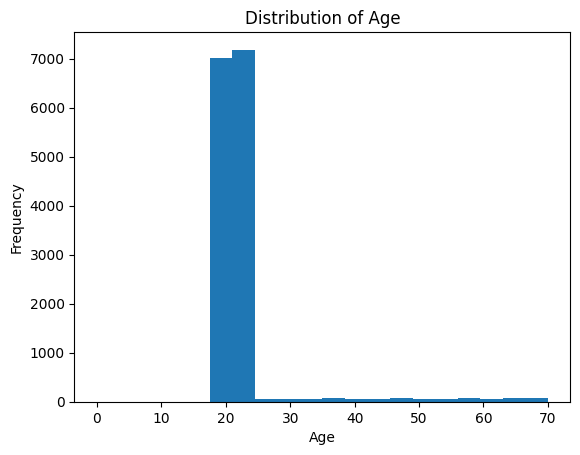

In [ ]:
df['Age'].plot(kind='hist',bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

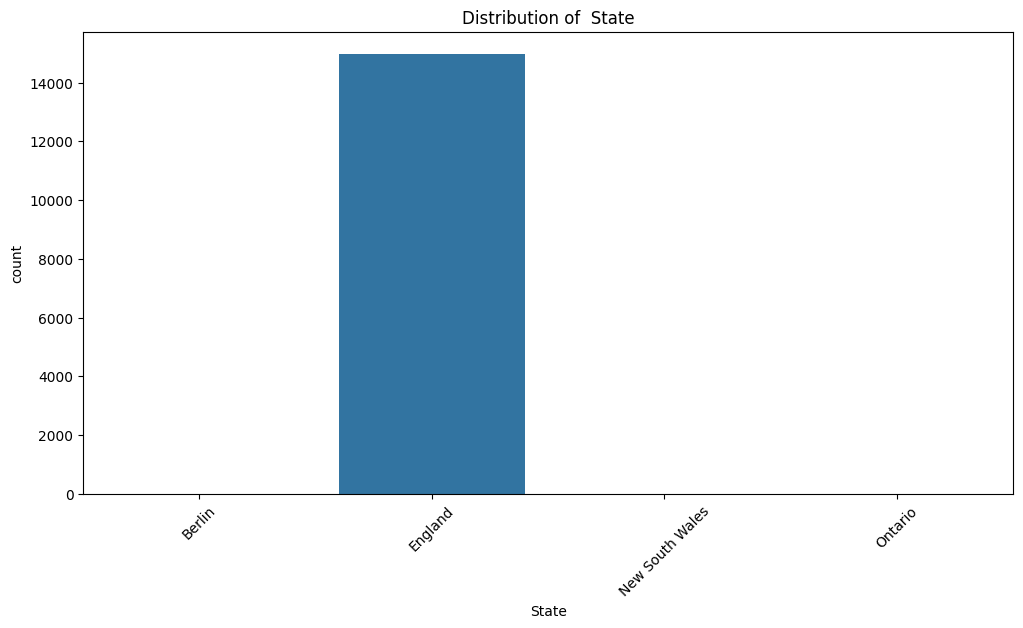

In [ ]:
top_10_state = df['State'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['State'].isin(top_10_state.index)], x='State')
plt.xlabel('State')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

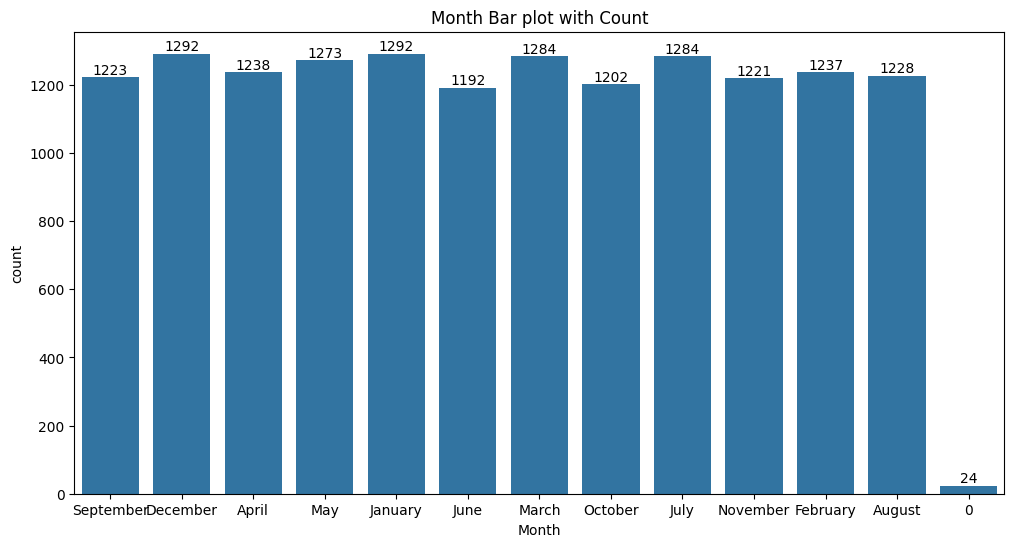

In [ ]:
plt.figure(figsize=(12, 6))
gender=sns.countplot(x='Month',data=df)


for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Month Bar plot with Count')
plt.show()

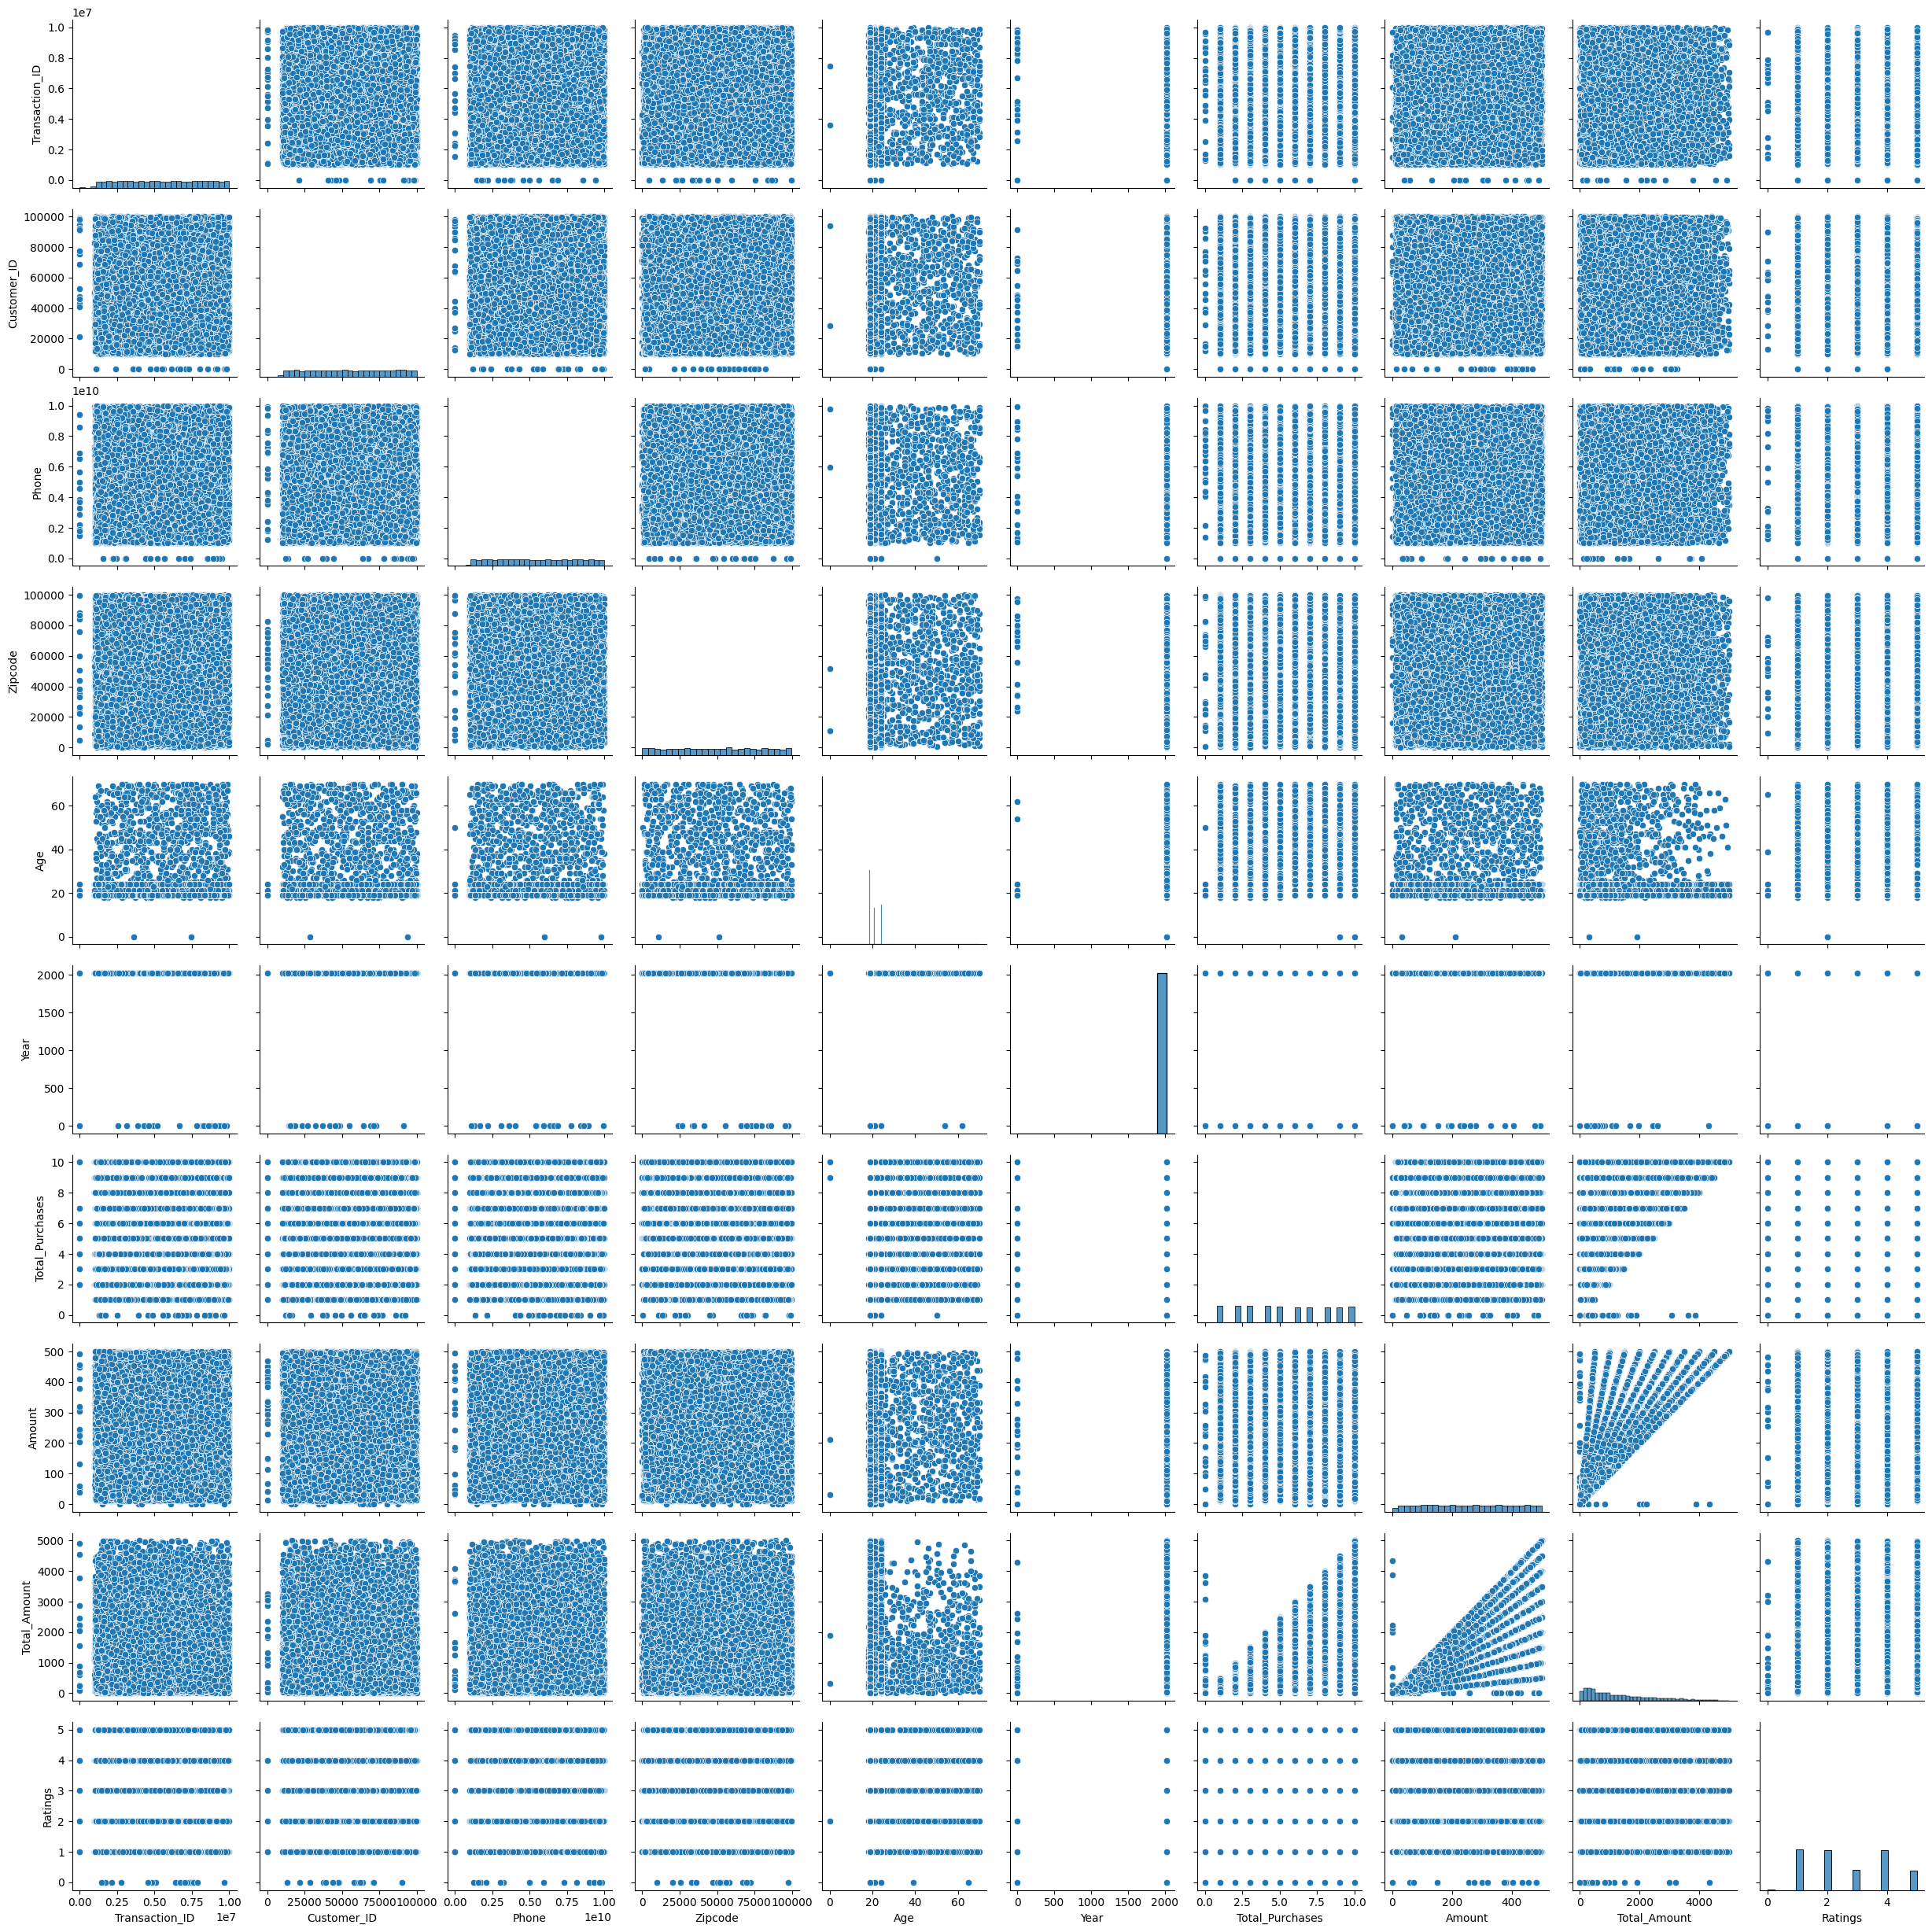

In [ ]:
sns.pairplot(df)

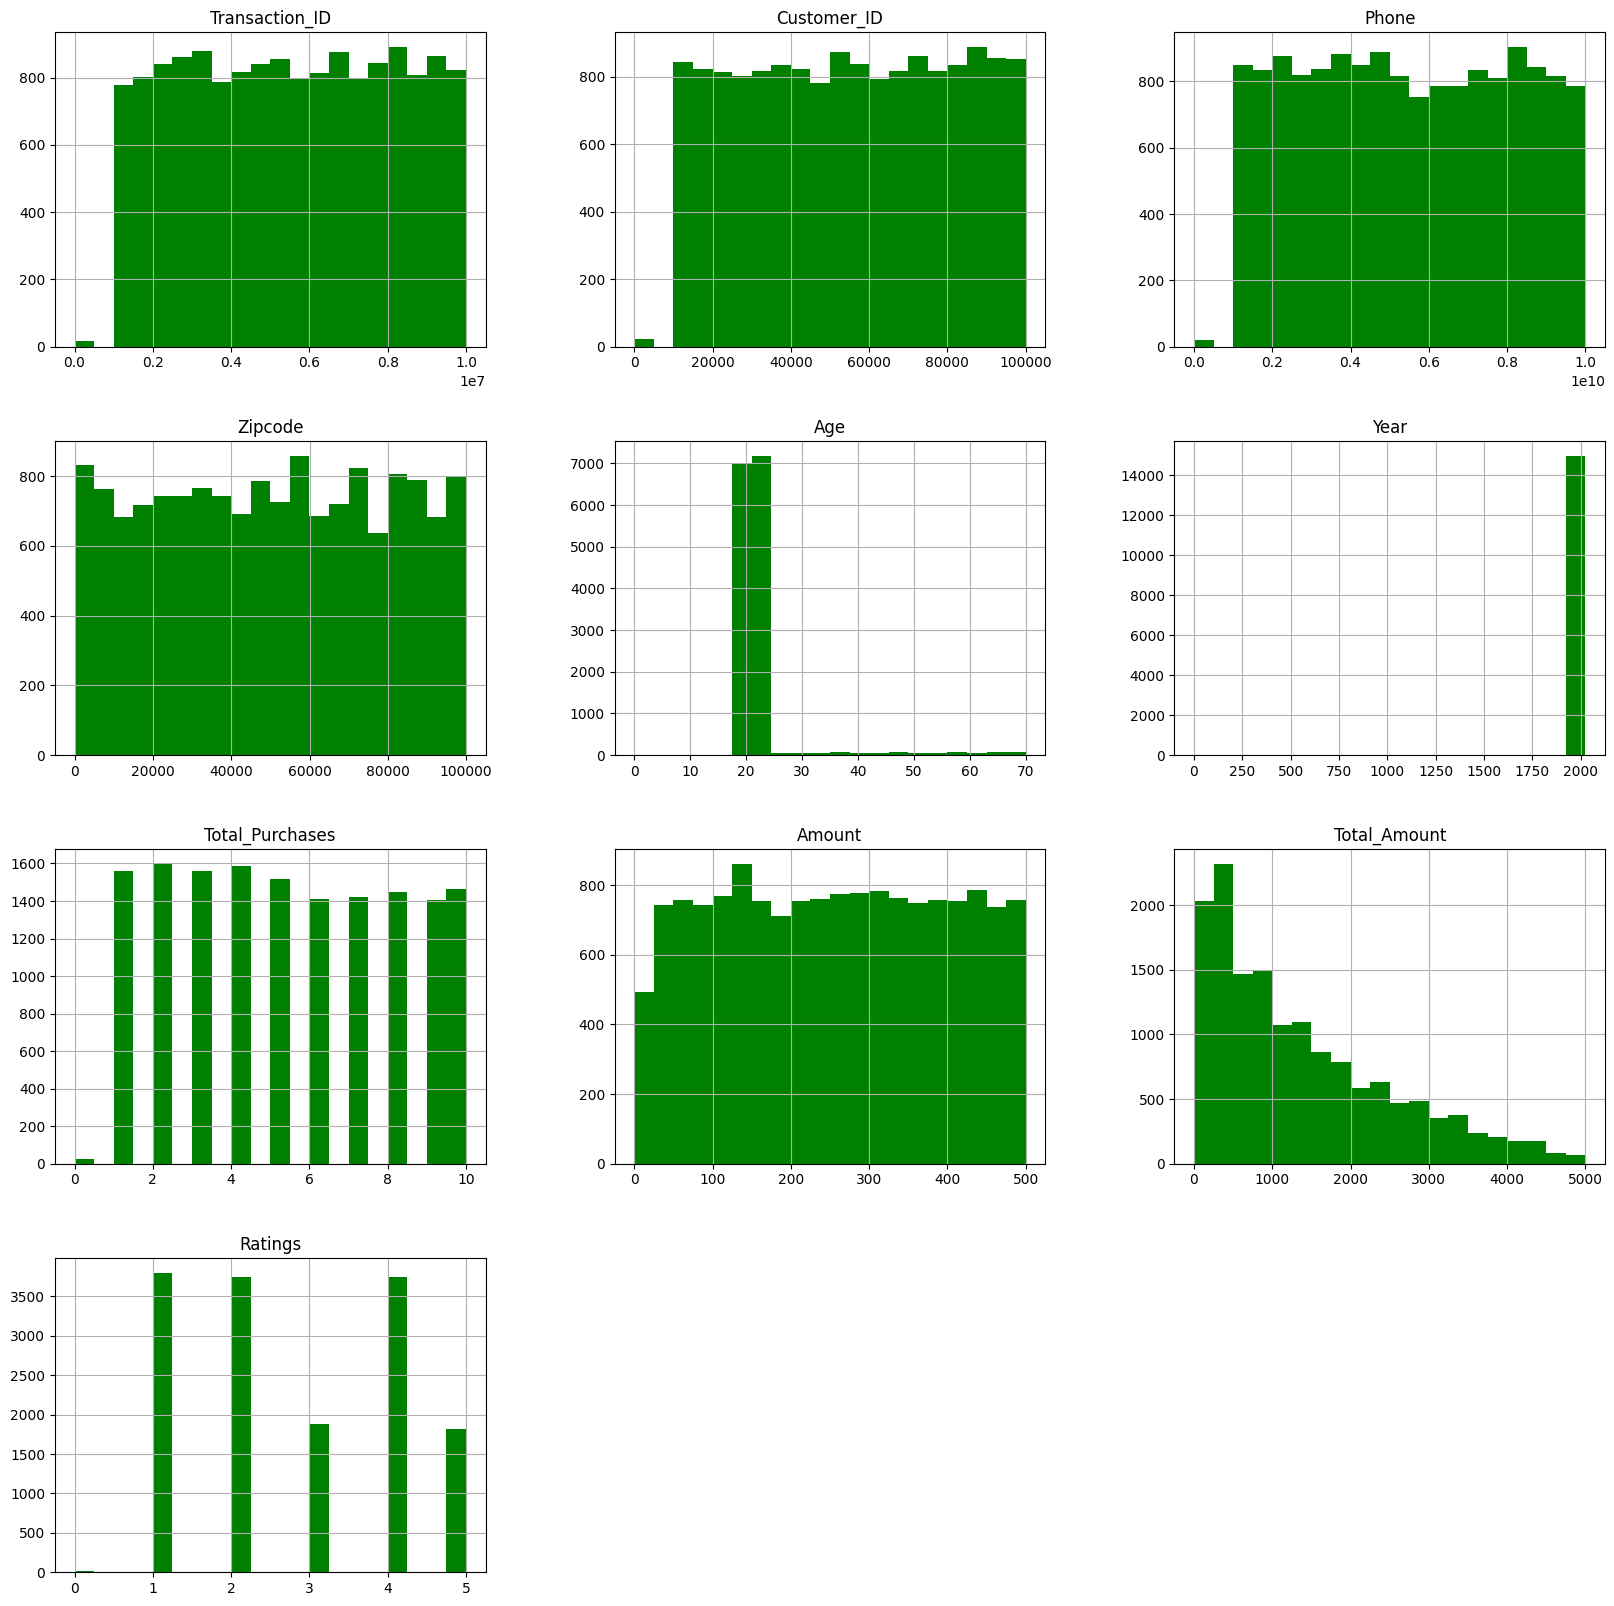

In [ ]:
df.hist(bins = 20, figsize = (20,20), color = 'g')
plt.show()